In [7]:
import os
import pandas as pd

os.chdir('..')

In [8]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
def plotting_fn(df, env_name, smoothing_factor=0):
    fig, ax = plt.subplots()
    ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    df.ewm(alpha=smoothing_factor).mean().plot(ax=ax)
    ax.set_xlabel("Environment interactions")
    ax.set_ylabel("Avg. reward")
    ax.set_title(env_name);
    fig.savefig(f"figures/reward_{env_name.lower()}.png", dpi=600)

In [15]:
env_name = "Hopper-v2"
root = os.path.join(os.getcwd(), f"KUCodebase\code\\runs") # Jesp
root = os.path.join(os.getcwd(), f"KUCodebase/code/runs") # AK KUCodebase/code/runs
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "reward" in name and env_name in path]

#df_hopper = pd.concat([pd.read_csv(p, header=None, index_col = 0,names=["it", p.split("runs")[-1].split("\\")[1]], usecols=[0,1]) for p in files], axis=1)
df_hopper = pd.concat([pd.read_csv(p, header=None, index_col = 0,names=["it", p.split("runs")[-1].split("/")[1].upper()], usecols=[0,1]) for p in files], axis=1)
df_hopper.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED':'DroQ_AD', 'DRQ_ADVANCED_2':'DroQ_AD_2','DRQ_ADVANCED_4':'DroQ_AD_4',
'DRQ_ADVANCED_8':'DroQ_AD_8', 'DRQ_ADVANCED_16':'DroQ_AD_16'}, inplace=True)

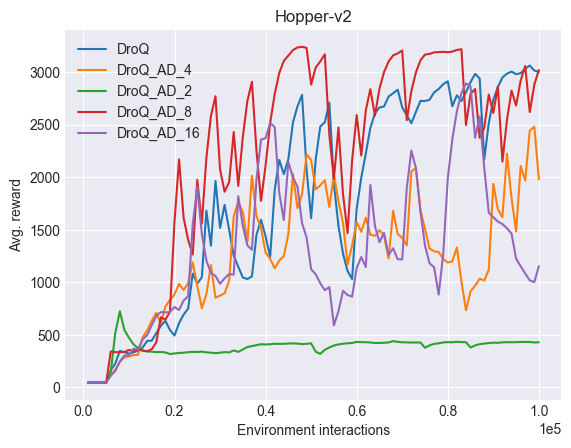

In [23]:
df_hopper

plotting_fn(df_hopper[['DroQ','DroQ_AD_4','DroQ_AD_2','DroQ_AD_8','DroQ_AD_16']], env_name, smoothing_factor=0.4)

In [31]:
def get_data_enviornment(env_name):
    #root = os.path.join(os.getcwd(), f"KUCodebase\code\\runs") # Jesp
    root = os.path.join(os.getcwd(), f"KUCodebase/code/runs") # AK
    files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "reward" in name and env_name in path]


    #df = pd.concat([pd.read_csv(p, header=None, index_col = 0,names=["it", p.split("runs")[-1].split("\\")[1]], usecols=[0,1]) for p in files], axis=1) # Jesp
    df = pd.concat([pd.read_csv(p, header=None, index_col = 0,names=["it", p.split("runs")[-1].split("/")[1].upper()], usecols=[0,1]) for p in files], axis=1) # AK

    return df.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED':'DroQ_AD'})


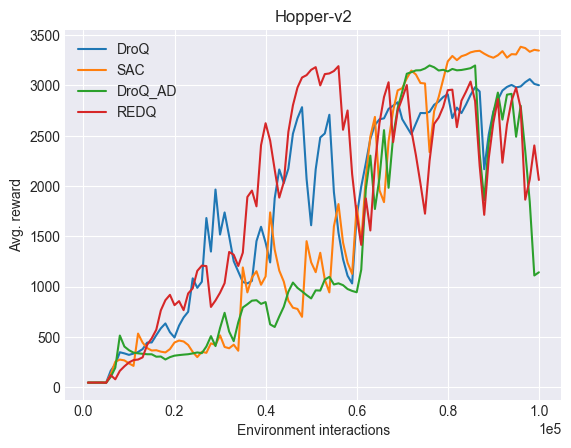

In [46]:
env_name = "Hopper-v2"
df_hopper = get_data_enviornment(env_name)
plotting_fn(df_hopper, env_name, smoothing_factor=0.4)

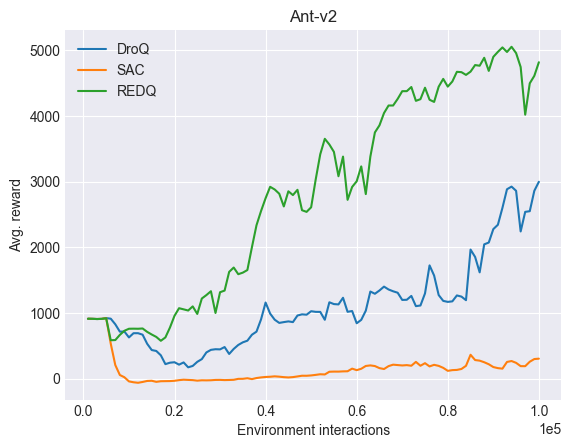

In [36]:
env_name = "Ant-v2"
df_ant = get_data_enviornment(env_name)

plotting_fn(df_ant, env_name, smoothing_factor=0.4)

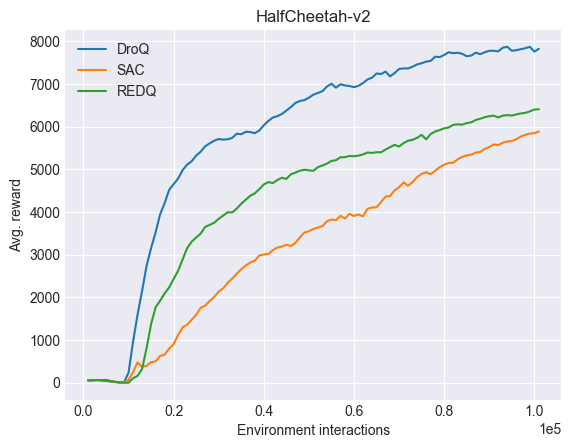

In [38]:
env_name = "HalfCheetah-v2"
df_cheetah = get_data_enviornment(env_name)

plotting_fn(df_cheetah, env_name, smoothing_factor=0.4)

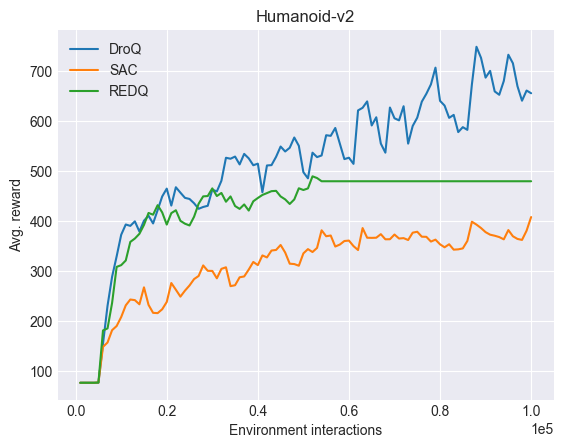

In [40]:
env_name = "Humanoid-v2"
df_human = get_data_enviornment(env_name)

plotting_fn(df_human, env_name, smoothing_factor=0.4)

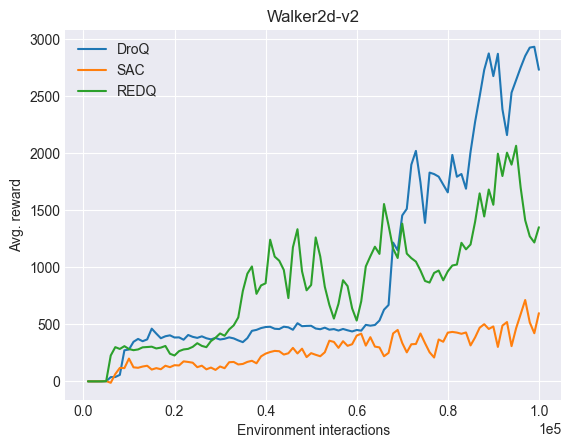

In [41]:
env_name = "Walker2d-v2"
df_walker2d = get_data_enviornment(env_name)

plotting_fn(df_walker2d, env_name, smoothing_factor=0.4)

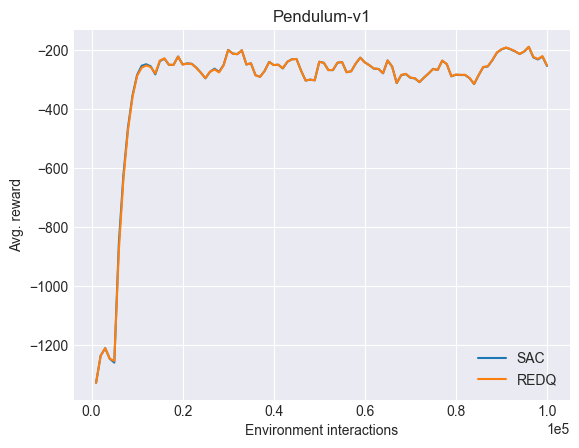

In [43]:
env_name = "Pendulum-v1"
df_pendulum = get_data_enviornment(env_name)

plotting_fn(df_pendulum, env_name, smoothing_factor=0.4)

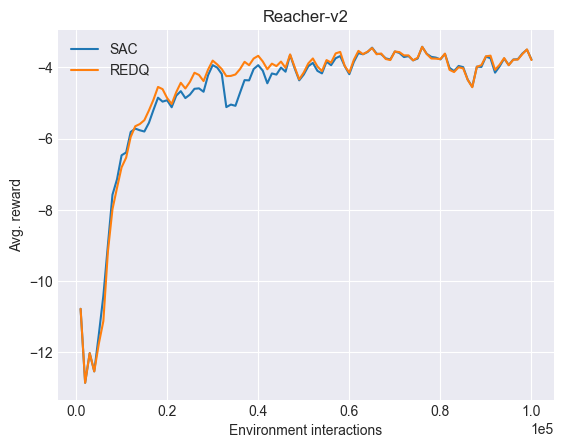

In [45]:
env_name = "Reacher-v2"
df_reacher = get_data_enviornment(env_name)

plotting_fn(df_reacher, env_name, smoothing_factor=0.4)

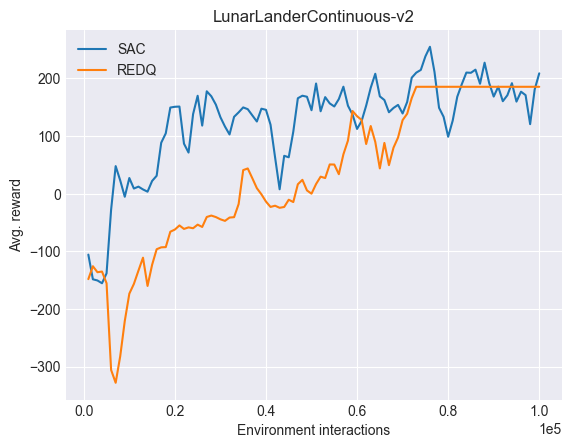

In [49]:
env_name = "LunarLanderContinuous-v2"
df_lunarlander = get_data_enviornment(env_name)

plotting_fn(df_lunarlander, env_name, smoothing_factor=0.4)